# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
# importing numpy and pandas
import numpy as np
import pandas as pd
# Importing Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy import stats
import missingno as msno

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Modules/Module4_ML/SeoulBikeData.csv', encoding= 'unicode_escape')

### Dataset First View

In [5]:
# Dataset First Look
df.head()


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"number of columns: {df.shape[1]}'\n' number of rows: {df.shape[0]}")

number of columns: 14'
' number of rows: 8760


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    8760
dtype: int64

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

<Figure size 1000x600 with 0 Axes>

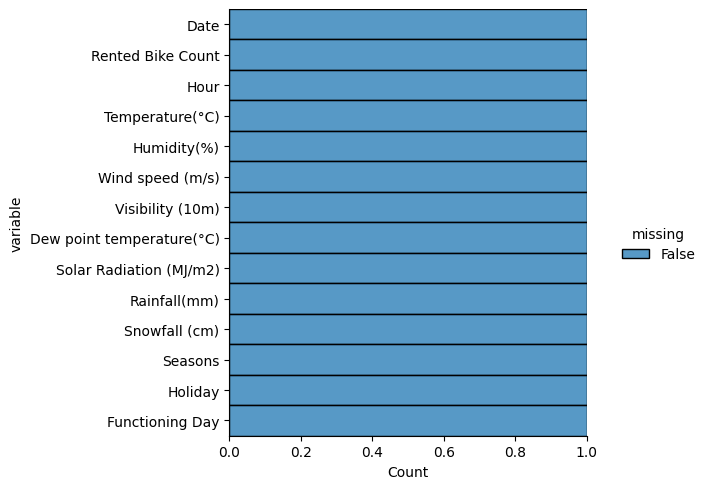

In [10]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(data=df.isna().melt(value_name="missing"), y="variable", hue="missing", multiple="fill", aspect=1.25);

### What did you know about your dataset?

There are 14 variables in this dataset, 10 are numerical columns and 4 are categorical columns:

Numerical variables:

**Rented Bike Count** - Number of bikes rented on a particular date

**Hour** - Time of the bike rent (hourly based)

**Temperature(°C)** - Temperature in Celsius

**Humidity(%)** - Relative humidity

**Wind speed (m/s)** - Aind speed

**Visibility (10m)** - Visibility due to mist/fog measured in mtrs

**Dew point temperature(°C)** - Air temperature in Celsius

**Solar Radiation (MJ/m2)** - MJ/m2

**Rainfall(mm)** - Raining measure of raifall in mm
**Snowfall (cm)** -

Categorical variables:

**Date** - date of the bike rented

**Seasons** - season at the time of rental ('Winter', 'Spring', 'Summer', 'Autumn')

**Holiday** - whether the day is considered a holiday

**Functioning Day** - whether the day is neither a weekend nor holiday

The dependent variable is '**Rented bike count**'. There are no missing values, null values and duplicates in this dataset.

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


### Variables Description

From the decsiption we can understand that the bikes are not rented on few days as the minimum of rented bike count and hour are 0. The features - Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm) and Snowfall (cm) have median(50 percentile) values very low compared to their maximum values, indicating the skewness of these columns.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
unique_values_df = pd.DataFrame(index = list(df.columns))
list_values = []
for var in list(df.columns):
 list_values.append(list(df[var].unique().tolist()))
unique_values_df['Unique Values'] = list_values
unique_values_df['Unique Value Count'] = df.nunique()
unique_values_df


,Unique Values,Unique Value Count
Date,"[01/12/2017, 02/12/2017, 03/12/2017, 04/12/201...",365
Rented Bike Count,"[254, 204, 173, 107, 78, 100, 181, 460, 930, 4...",2166
Hour,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",24
Temperature(°C),"[-5.2, -5.5, -6.0, -6.2, -6.4, -6.6, -7.4, -7....",546
Humidity(%),"[37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 2...",90
Wind speed (m/s),"[2.2, 0.8, 1.0, 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, ...",65
Visibility (10m),"[2000, 1928, 1996, 1936, 793, 1913, 1687, 1380...",1789
Dew point temperature(°C),"[-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19...",556
Solar Radiation (MJ/m2),"[0.0, 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01...",345
Rainfall(mm),"[0.0, 0.5, 1.0, 2.5, 0.1, 0.2, 0.3, 0.7, 1.6, ...",61


There are 3 categorical columns (Seasons, Holiday and Functioning Day):

Seasons column has 4 unique values (Winter, Spring, Summer, Autumn)

Holiday and Functioning Day columns each have 2 unique values (Holiday, No Holiday) and (Yes, No) respectively.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

#To analyze the rentals on hourly basis, we can split the column 'Date' into day, month and year

df['weekday'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce').dt.dayofweek
df[['Day', 'Month', 'Year']] = df['Date'].str.split("/", expand = True)
df.drop("Date", axis='columns', inplace = True)

In [15]:
df.groupby("Holiday")["Rented Bike Count"].sum().sort_values().reset_index()

,Holiday,Rented Bike Count
0,Holiday,215895
1,No Holiday,5956419


In [16]:
df.groupby("Functioning Day")["Rented Bike Count"].sum().sort_values().reset_index()

,Functioning Day,Rented Bike Count
0,No,0
1,Yes,6172314


In [17]:
df.drop(index = [row for row in df.index if df.loc[row, 'Functioning Day']=='No'], axis='rows', inplace = True)
df.drop("Functioning Day", axis = "columns", inplace = True)
df.shape

(8465, 16)

### What all manipulations have you done and insights you found?

Extracted the day, week, month and year features from "Date" column. And we can see the counts variations on these features.


The rented bike count is zero for non functioning days. This indicates that the bikes are rented on functioning days only. The bikes will not be available to rent during non functioning days and therefore, bike count will be zero on non functioning day. Therefore, the 295 rows with 0 values in "Rented Bike Count" column with Funtioning Day as 'No' are dropped and dropped functioning day column as well.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

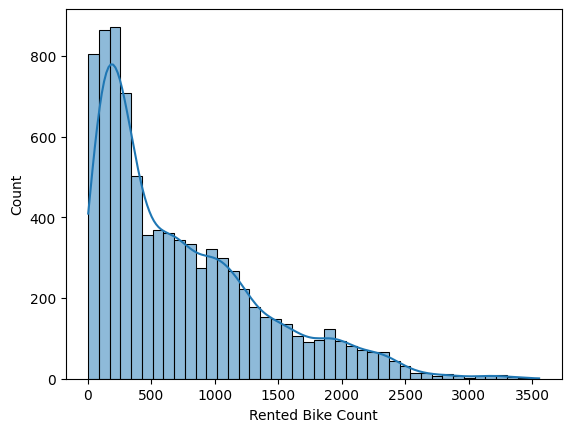

In [18]:
# Chart - 1 visualization code

sns.histplot(data=df, x='Rented Bike Count', kde = True);

##### 1. Why did you pick the specific chart?

The bar charts are ideal for bivariate comparison. We can see the count of rented bikes with respect to hour, day, month and year.

##### 2. What is/are the insight(s) found from the chart?

From the above charts we can say that the bookings were higher in year 2018.
If we see month wise, highest bookings done in month of june. There is also highest count at 8AM and in the evening at 6PM to 7PM.

#### Chart - 2

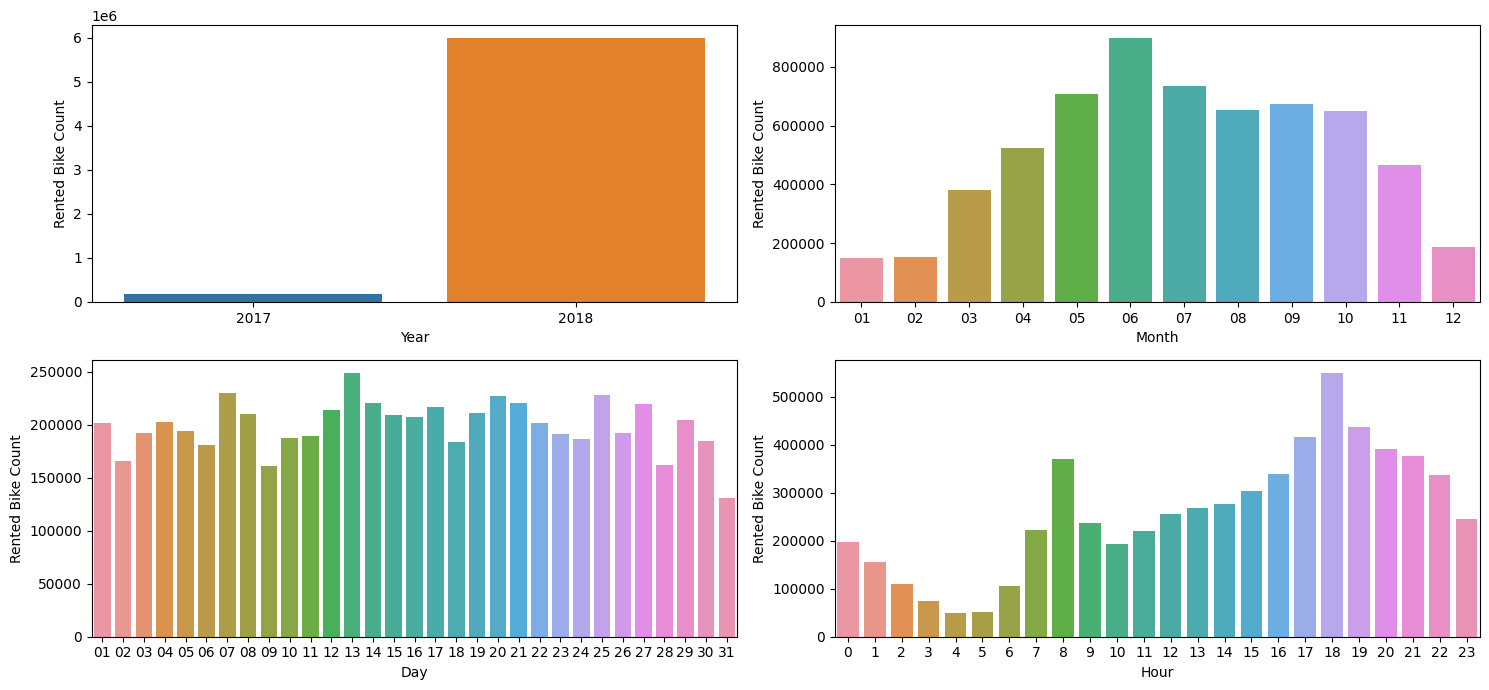

In [19]:
# Chart - 2 visualization code

df1 = df.loc[:, ['Year', 'Rented Bike Count']].groupby('Year')['Rented Bike Count'].sum().reset_index()
df2 = df.loc[:, ['Month', 'Rented Bike Count']].groupby('Month')['Rented Bike Count'].sum().reset_index()
df3 = df.loc[:, ['Day', 'Rented Bike Count']].groupby('Day')['Rented Bike Count'].sum().reset_index()
df4 = df.loc[:, ['Hour', 'Rented Bike Count']].groupby('Hour')['Rented Bike Count'].sum().reset_index()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (15,7))

sns.barplot(data = df1, x = "Year", y="Rented Bike Count", ax=ax1)
sns.barplot(data = df2, x = "Month", y="Rented Bike Count",ax=ax2)
sns.barplot(data = df3, x = "Day", y="Rented Bike Count",ax=ax3)
sns.barplot(data = df4, x = "Hour", y="Rented Bike Count", ax=ax4)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The bar plot is good for bivariate comparison. We can understand the variations of the rented bikes count for year, month, day and hour features.

##### 2. What is/are the insight(s) found from the chart?

The barplot shows that the bikes were rented mostly in morning and evening (peak working hours).

#### Chart - 3

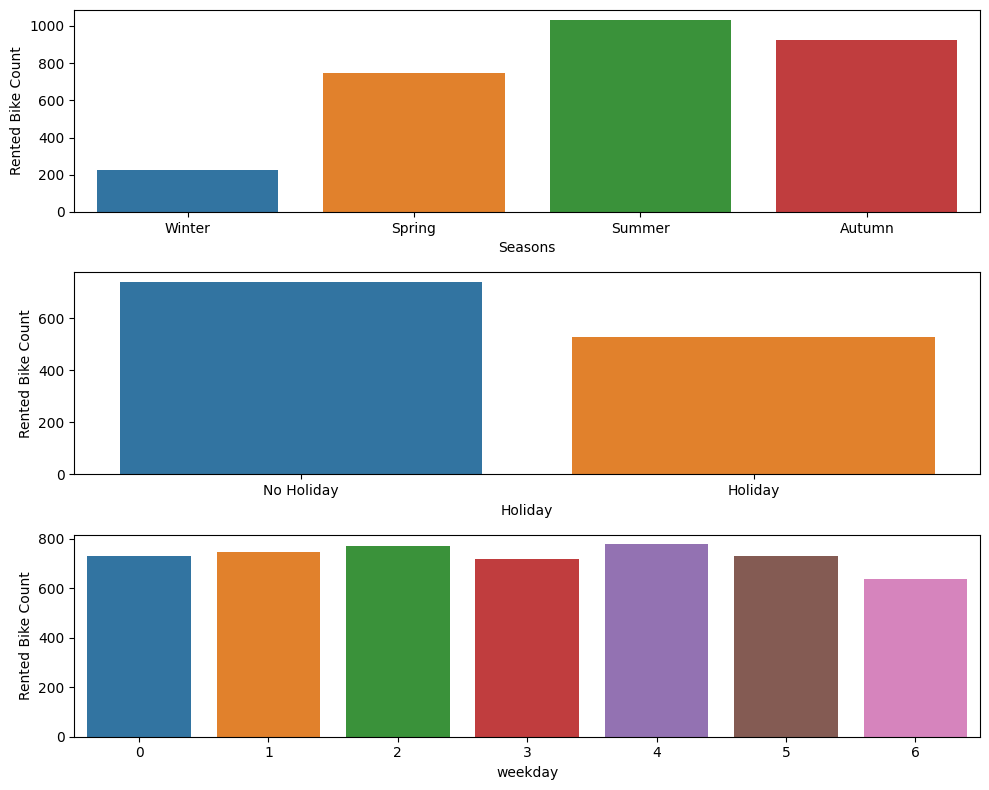

In [20]:
# Chart - 3 visualization code

fig, axs = plt.subplots(nrows=3, ncols=1, figsize = (10, 8))
axs = axs.flatten()

ax_count = 0
for i in ['Seasons', 'Holiday', 'weekday']:
  sns.barplot(data = df, x = i, y="Rented Bike Count", ax=axs[ax_count], errorbar = None)
  ax_count +=1
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The bar plot is good for bivariate comparison. We can understand the variations of the rented bikes count for Seasons and Holiday features.

##### 2. What is/are the insight(s) found from the chart?

The barplot shows that the bikes were rented mostly in summer season and workingdays(no holidays).There is almost equal demand for entire week except Sundays, we can assume here the dip of count is due to weekend.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 4

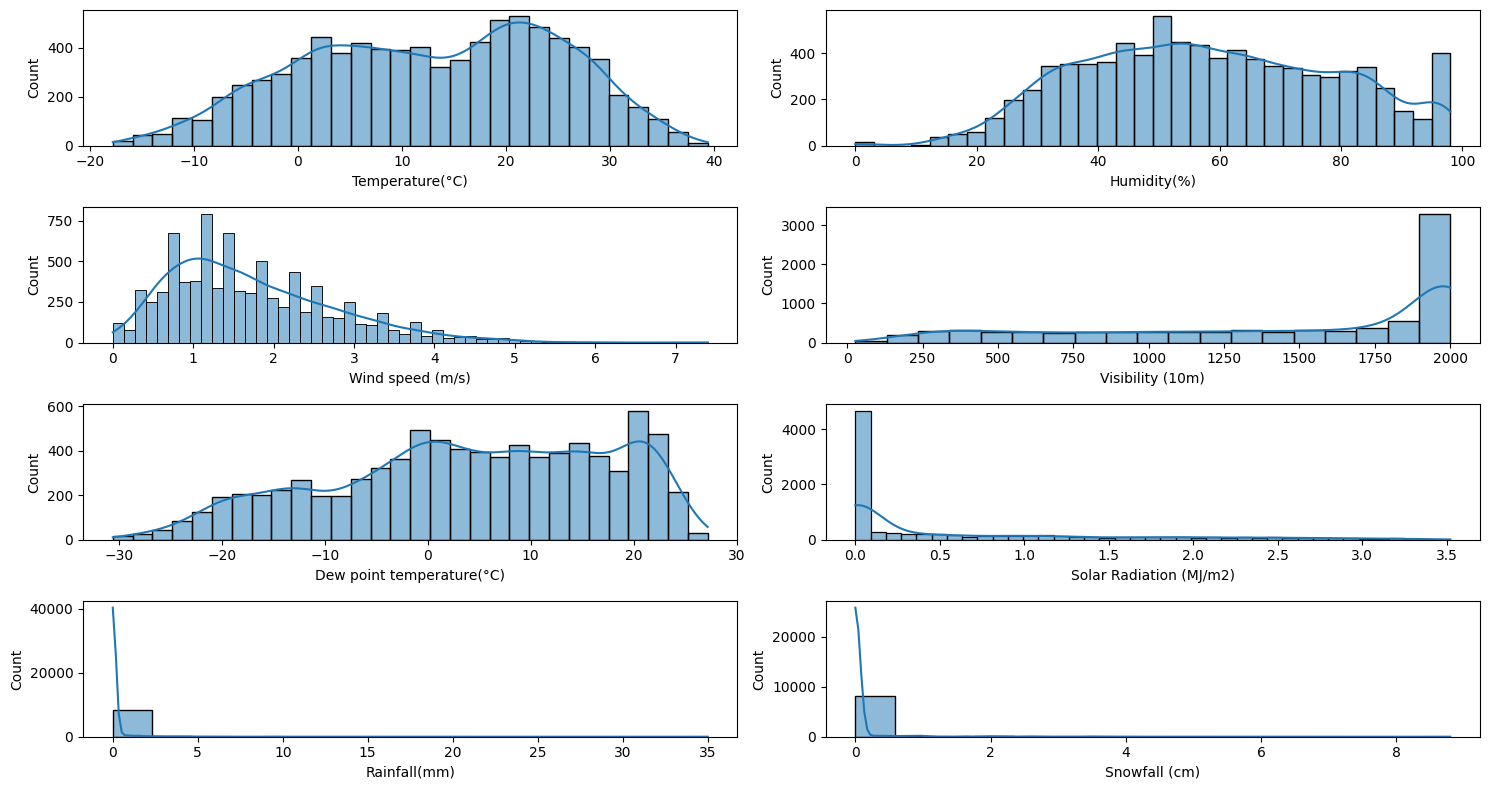

In [21]:
# Chart - 4 visualization code - histogram charts for numerical features

fig, axs = plt.subplots(nrows=4, ncols=2, figsize = (15, 8))
axs = axs.flatten()

ax_count = 0
for i in df.columns:
  if i not in ['Rented Bike Count', 'Hour', 'Seasons', 'Holiday', 'weekday', 'Year', 'Month', 'Day']:
    sns.histplot(data = df, x = df[i], ax=axs[ax_count-2], kde = True)
  ax_count +=1
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The histplot helps in understanding the distribution of the numerical features.

##### 2. What is/are the insight(s) found from the chart?

From the plots, we understand that the 'Temperature', 'Humidity' and 'Dew point teperature' are close to normal distribution, where are 'solar radiation', 'rainfall' and 'snowfall' are highly skewed towards right and 'visibility' is highly skewed towards left.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 5

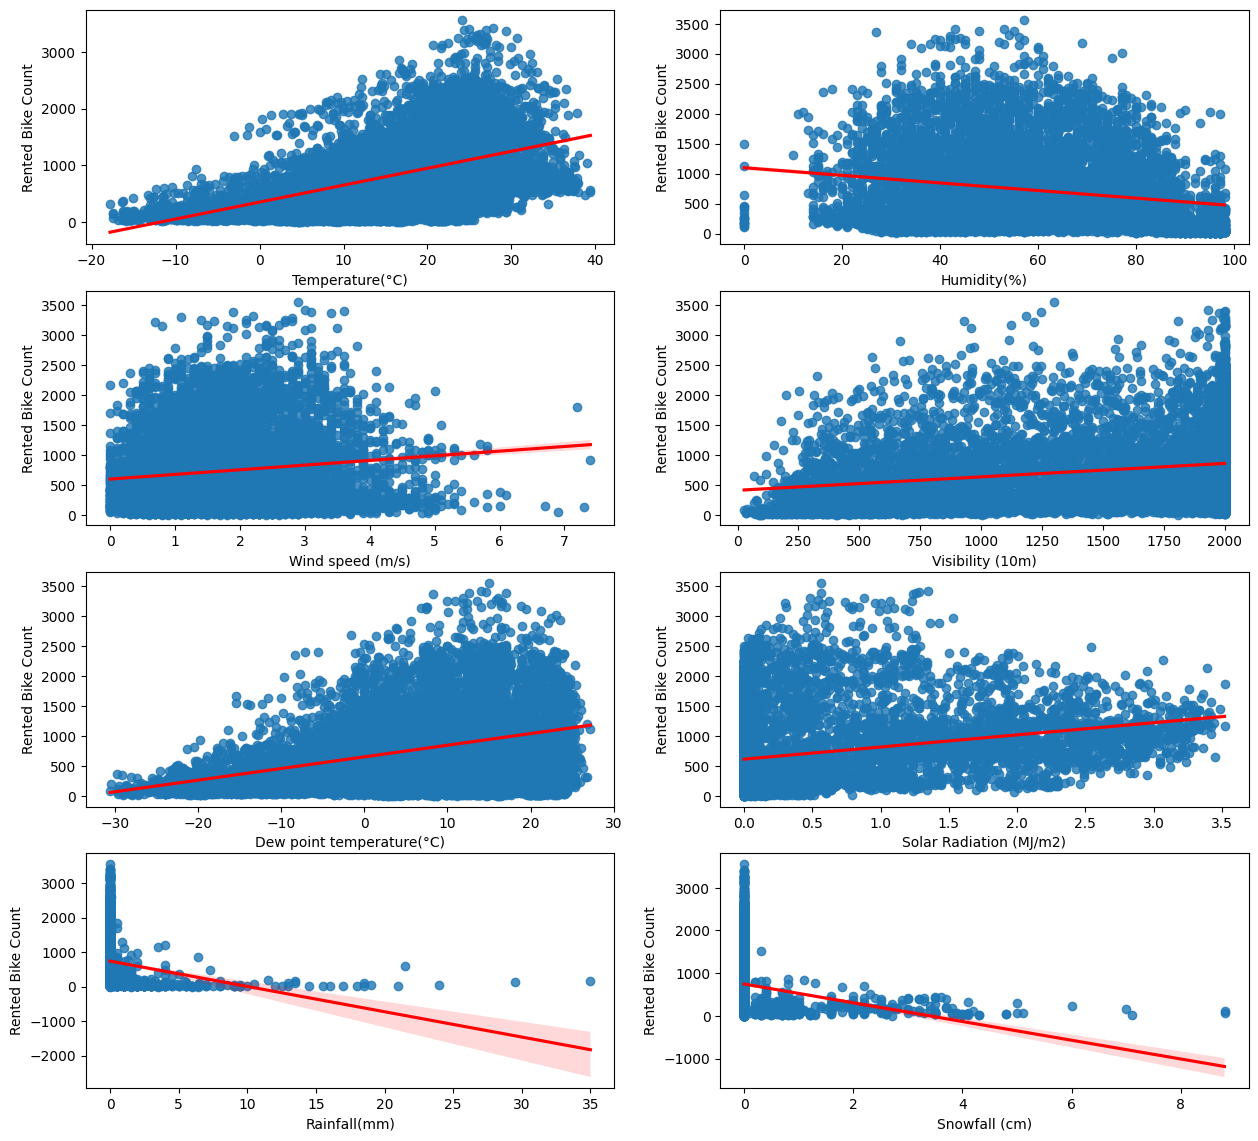

In [22]:
# Chart - 5 visualization code

#bikes rentals with respect to weather conditions
fig, axs = plt.subplots(nrows=4, ncols=2, figsize = (15,14))
axs = axs.flatten()
ax_cnt = 0
for i in df.columns:
  if i not in ['Rented Bike Count', 'Hour', 'Year', 'Month', 'Day',  'Seasons', 'Holiday', 'weekday']:
    sns.regplot(x = df[i], y = "Rented Bike Count", data = df, ax=axs[ax_cnt-2], line_kws={"color": "red"})
  ax_cnt +=1
plt.show()


##### 1. Why did you pick the specific chart?

regplot gives the information about corelation of the 2 features. The red line is regression line which shows how the x-axis feature is related with y-axis feature.

##### 2. What is/are the insight(s) found from the chart?

We see that 'Humidity', 'ranifall' and 'Snowfall' are negatively corelated with 'Rented Bike count' feature.

#### Chart - 6

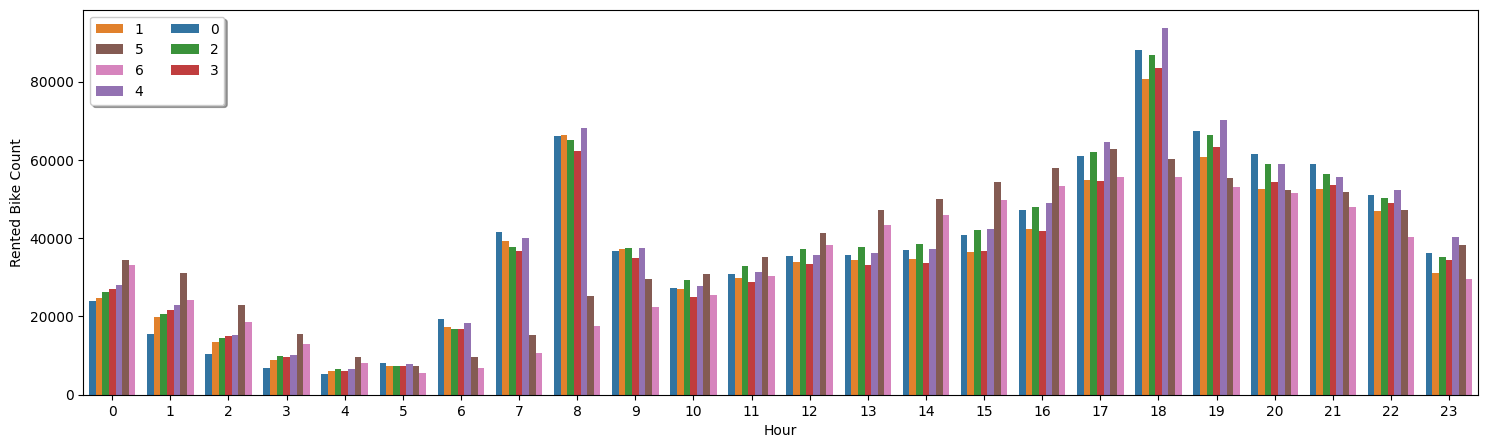

In [23]:
# Chart - 6 visualization code

#Rented bikes count per hour on weekday basis

fig = plt.figure(figsize=(18, 5))

group_day_hour = pd.DataFrame(df.groupby(['weekday', 'Hour'])['Rented Bike Count'].sum()).reset_index()
sns.barplot(data=group_day_hour, x='Hour', y='Rented Bike Count', hue='weekday')
#axes[1].set(xlabel='Hour in the day', ylabel='Count', title='Average Bike Rentals by the day across Weekdays')
handles, labels = plt.gca().get_legend_handles_labels()
handles = [handles[1], handles[5], handles[6], handles[4], handles[0], handles[2], handles[3]]
labels = [labels[1], labels[5], labels[6], labels[4], labels[0], labels[2], labels[3]]
plt.legend(handles, labels, ncol=2, shadow=True, loc='upper left')

##### 2. What is/are the insight(s) found from the chart?

The chart shows the hourly count variations across weekdays. We can see that the counts on weekends dip in peak hours and increases in the afternoon time. Similarly, we see the increase in count on weekdays duing peak hours.

#### Chart - 7

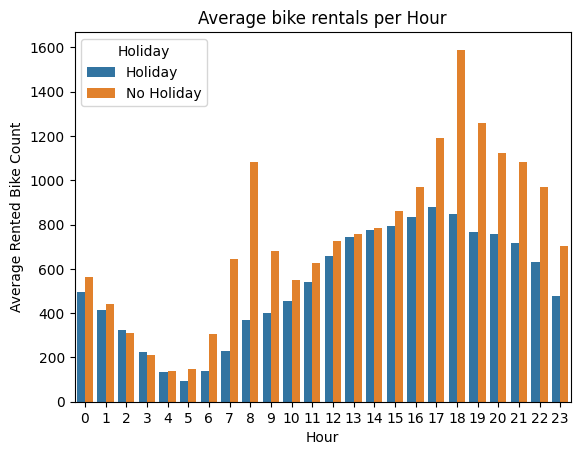

In [24]:
# Chart - 7 visualization code

df_mean_hourly = df.loc[:, ['Hour', 'Holiday', 'Rented Bike Count']].groupby(['Hour','Holiday'])['Rented Bike Count'].mean().reset_index()
sns.barplot(data=df_mean_hourly, x='Hour', y='Rented Bike Count', hue='Holiday')
plt.title('Average bike rentals per Hour')
plt.ylabel("Average Rented Bike Count")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

The hourly count on non-holidays is more that on holidays

#### Chart - 8

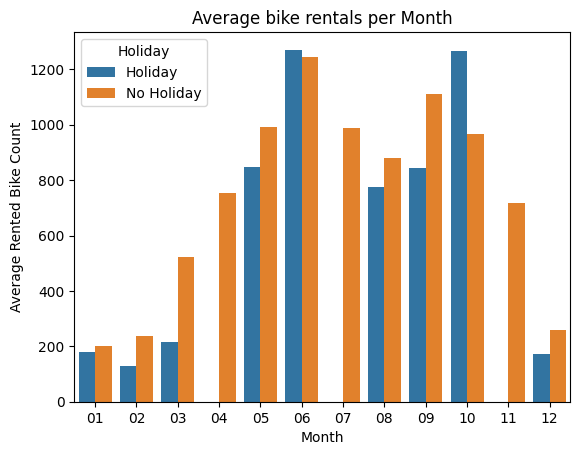

In [25]:
# Chart - 8 visualization code

df_mean_monthly = df.loc[:, ['Month', 'Holiday', 'Rented Bike Count']].groupby(['Month','Holiday'])['Rented Bike Count'].mean().reset_index()
sns.barplot(data=df_mean_monthly, x='Month', y='Rented Bike Count', hue='Holiday')
plt.title('Average bike rentals per Month')
plt.ylabel("Average Rented Bike Count")
plt.show()

##### 2. What is/are the insight(s) found from the chart?

The plot of monthly count on holiday feature - there is increase in count in 6th & 10th month(June and October).

#### Chart - 9

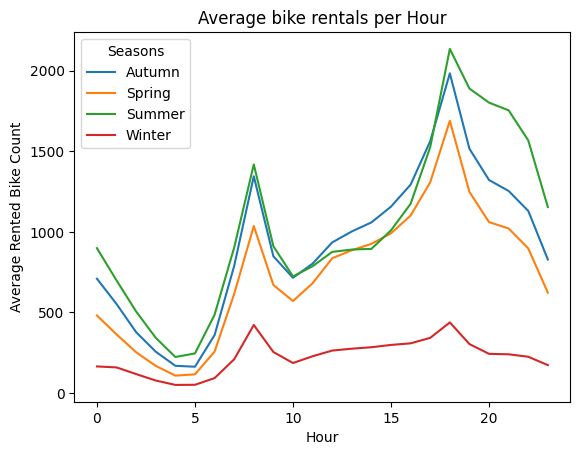

In [26]:
# Chart - 9 visualization code
mean_hourly = df.loc[:, ['Hour', 'Seasons', 'Rented Bike Count']].groupby(['Hour','Seasons'])['Rented Bike Count'].mean().reset_index()
sns.lineplot(data=mean_hourly, x='Hour', y='Rented Bike Count', hue='Seasons')
plt.title('Average bike rentals per Hour')
plt.ylabel("Average Rented Bike Count")
plt.show()

##### 1. Why did you pick the specific chart?

lineplot gives the variations in counts between features.

##### 2. What is/are the insight(s) found from the chart?

The count is higher in peak hours and higher in summer and autumn seasions.

#### Chart - 10

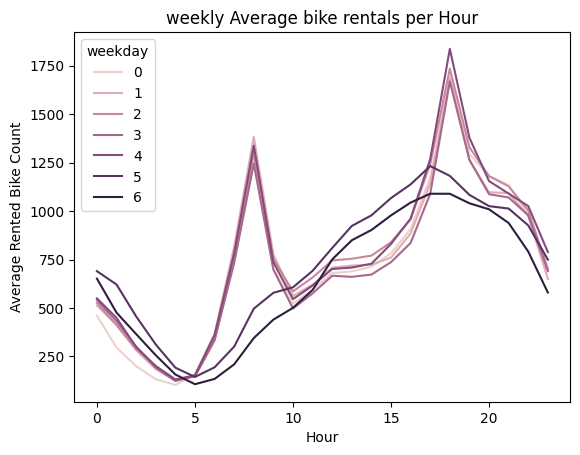

In [27]:
# Chart - 10 visualization code

weekday_mean_hourly = df.loc[:, ['Hour', 'weekday', 'Rented Bike Count']].groupby(['Hour','weekday'])['Rented Bike Count'].mean().reset_index()
sns.lineplot(data=weekday_mean_hourly, x='Hour', y='Rented Bike Count', hue='weekday')
plt.title('weekly Average bike rentals per Hour')
plt.ylabel("Average Rented Bike Count")
plt.show()


##### 1. Why did you pick the specific chart?

Line plot is easier to understand the occurrence of a value multiple times.

##### 2. What is/are the insight(s) found from the chart?

We see that the count is higher in peak hours as we have already observed it in previous plots. And the plot shows the high count during peak hours on weekdays(week 0 to week 4) and high count in the middle of the day on weekends (week 5 and week 6)

#### Chart - 11

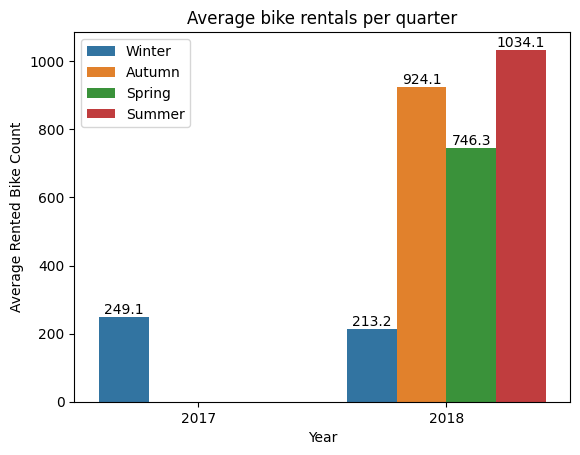

In [28]:
# Chart - 11 visualization code

df_mean_quarterly = df.loc[:, ['Year', 'Seasons', 'Rented Bike Count']].groupby(['Year','Seasons'])['Rented Bike Count'].mean().reset_index()
ax = sns.barplot(data=df_mean_quarterly, x='Year', y='Rented Bike Count', hue='Seasons')

for bars in ax.containers:
        ax.bar_label(bars, fmt='%.1f')

plt.title('Average bike rentals per quarter')
plt.ylabel("Average Rented Bike Count")
plt.legend(loc = 'upper left')
plt.show()

##### 2. What is/are the insight(s) found from the chart?

The count is higher in year 2018 than 2017, this maybe because the company was new in 2017 and most users are unaware of it.

#### Chart - 12

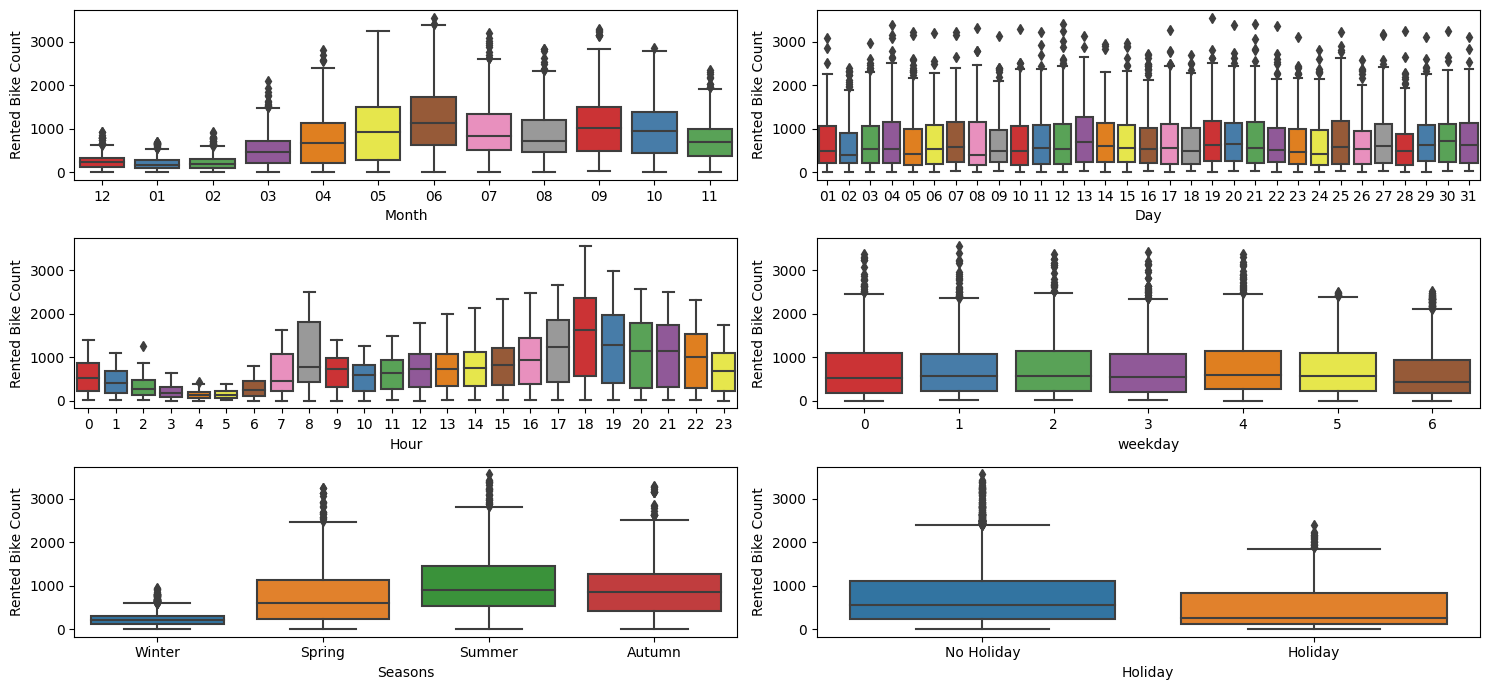

In [29]:
# Chart - 12 visualization code
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize = (15,7))
sns.boxplot(data = df, x = "Month", y="Rented Bike Count", ax=ax1, palette = 'Set1')
sns.boxplot(data = df, x = "Day", y="Rented Bike Count",ax=ax2, palette = 'Set1')
sns.boxplot(data = df, x = "Hour", y="Rented Bike Count",ax=ax3, palette = 'Set1')
sns.boxplot(data = df, x = "weekday", y="Rented Bike Count", ax=ax4, palette = 'Set1')
sns.boxplot(data = df, x= "Seasons", y="Rented Bike Count", ax=ax5)
sns.boxplot(data = df, x="Holiday", y="Rented Bike Count", ax=ax6)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot is ideal for understand the presence of outliers in the features.

##### 2. What is/are the insight(s) found from the chart?

From the plot, we understand that there are outliers in summer, Spring seasions, non holidays and weekdays (compared to weekends).

#### Chart - 13

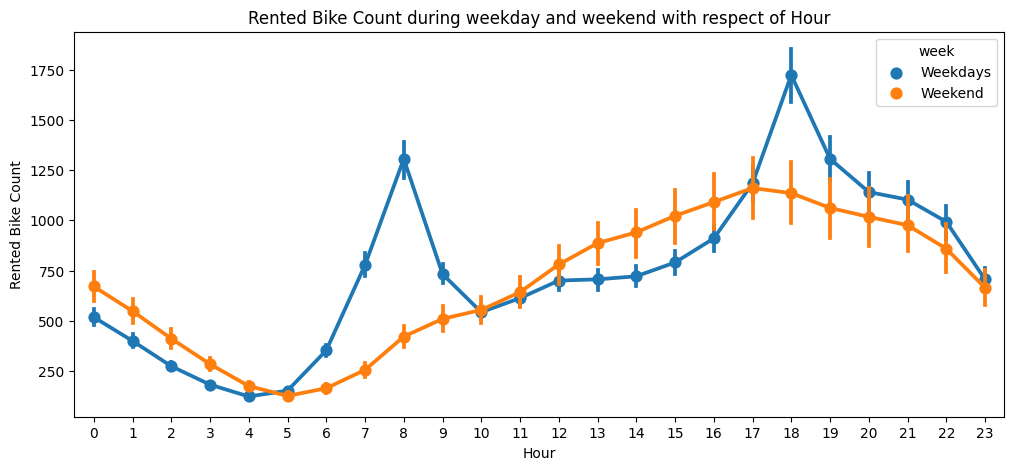

In [30]:
# Chart - 13 visualization code
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
df['week'] = df['weekday'].apply(lambda x:'Weekend'  if x==5 or  x== 6 else 'Weekdays')
df.week.value_counts()

plt.figure(figsize=(12,5))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour");

##### 1. Why did you pick the specific chart?

With lineplot we can see the data curve across the hours axis clearly.

##### 2. What is/are the insight(s) found from the chart?

 The plot shows the bike demand is higher in weekend afternoons whereas the demand is higher during office hours in weekdays.

#### Chart - 14 - Correlation Heatmap

<ipython-input-31-f2d2e47ca90f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


<Axes: >

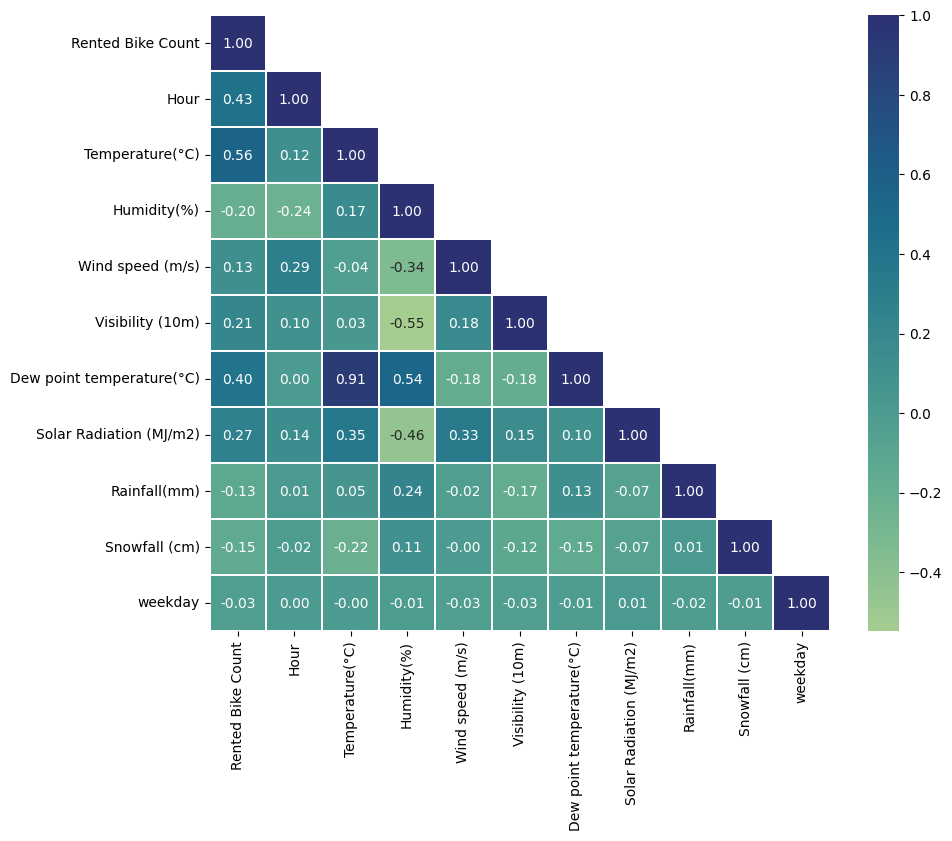

In [31]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
correlations = df.corr()
mask = np.array(correlations)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(correlations, mask=mask, annot = True, fmt=".2f", cmap='crest', linewidths=0.1)

##### 1. Why did you pick the specific chart?

correlation map shows the correlation between features.

##### 2. What is/are the insight(s) found from the chart?

We can see that the "rented bike count" feature is highly corelated with Temperature, Hour and Dew point temperature. And we can also understand the corelation between independent features, temperature and dew point temperature, dew point temperature and humidity.

#### Chart - 15 - Pair Plot

In [32]:
# Pair Plot visualization code
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

pair plot shows the bivariate distribution of the data.


##### 2. What is/are the insight(s) found from the chart?

We can see that very few features are normally distributed with respect to "Rented Bike count" feature.